In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame(pd.read_excel("./Fall 2012-15 Cohort Students with Grad Info for Curricular Complexity Analysis 27-AUG-21.xlsx", header=0))
df = df[df['CURRICULAR_COMPLEXITY'].notna()]
# df.drop('PR', axis=1, inplace=True)
df.head()

,UNIQUE_ID,ISWHITE,FIRST_GEN_STUDENT,NUMBER_OF_COHORTS_STUDENT_IS_IN_BETWEEN_FALL2012_FALL2015,COHORT_TERM,COHORT_YEAR,COHORT_CODE,CHRT_TERM_PRI_PROGRAM,CHRT_TERM_PRI_PRGM_DESC,CHRT_TERM_PRI_MAJOR,...,GRADUATED_IN_6Y,UG_USU_GPA_LAST_ATTEND_OR_GRAD_TERM,CURRENT_UG_USU_GPA,EVER_GRADUATED_WITH_BACH,NUMBER_BACH_DEGREES_AWARDED,BACH_GRAD_TERM (when the student didn't graduate with primary program),BACH_PROGRAM (when the student didn't graduate with primary program),BACH_MAJOR (when the student didn't graduate with primary program),CURRICULAR_COMPLEXITY,OLD_CURRICULAR_COMPLEXITY
0,430706564270706527,1.0,1,1,201240,2012,1240FDF4,MISY_BS,Management Info Systems BS,MISY,...,1,3.68,3.68,Y,1.0,NaN,NaN,NaN,161.0,120.0
3,280005371300005330,0.0,0,1,201240,2012,1240FDF4,MEEN_PPRU,Mechanical Engineering PPRU,MEEN,...,1,3.58,3.59,Y,1.0,NaN,NaN,NaN,432.0,352.0
6,426731947296731929,1.0,0,1,201240,2012,1240FDF4,HEPR_COHE_BS,Health Ed Comm Health Emph BS,HEPR,...,1,3.49,3.49,Y,1.0,NaN,NaN,NaN,78.0,52.0
7,571961311291961329,1.0,0,1,201240,2012,1240FDF4,CDDE_BS,Comm Disorders & Deaf Ed BS,CDDE,...,1,3.80,3.80,Y,1.0,NaN,NaN,NaN,54.0,98.0
8,711220482301220430,1.0,0,1,201240,2012,1240FDF4,UBUS_PPRU,Pre-Business,UBUS,...,1,3.25,3.25,Y,1.0,NaN,NaN,NaN,161.0,120.0


## Get complexities from 40 to 500

In [3]:
n = []
for i in range(40, 500, 10):
    n.append(i)

complexities_df = pd.DataFrame({"complexities": n})

## Get count of students by complexity score (grain is students)

In [4]:
count_of_students_by_complexity = []
for c in complexities_df['complexities']:
    count = df[ (df['CURRICULAR_COMPLEXITY'] >= c) & (df["CURRICULAR_COMPLEXITY"] < c+10)]['UNIQUE_ID'].count()
    count_of_students_by_complexity.append(count)
complexities_df['count_of_students_by_complexity'] = count_of_students_by_complexity

## Add columns 'number_graduated_4_yrs', 'number_graduated_5_yrs', 'number_graduated_6_yrs'

In [5]:
number_graduated_4_yrs = []
number_graduated_5_yrs = []
number_graduated_6_yrs = []

for c in complexities_df['complexities']:
    num_4yrs = df[ (df['CURRICULAR_COMPLEXITY'] >= c) & (df["CURRICULAR_COMPLEXITY"] < c+10)]['GRADUATED_IN_4Y'].sum()
    num_5yrs = df[ (df['CURRICULAR_COMPLEXITY'] >= c) & (df["CURRICULAR_COMPLEXITY"] < c+10)]['GRADUATED_IN_5Y'].sum()
    num_6yrs = df[ (df['CURRICULAR_COMPLEXITY'] >= c) & (df["CURRICULAR_COMPLEXITY"] < c+10)]['GRADUATED_IN_6Y'].sum()
    
    number_graduated_4_yrs.append(num_4yrs)
    number_graduated_5_yrs.append(num_5yrs)
    number_graduated_6_yrs.append(num_6yrs)
    
complexities_df['number_graduated_4_yrs'] = number_graduated_4_yrs
complexities_df['number_graduated_5_yrs'] = number_graduated_5_yrs
complexities_df['number_graduated_6_yrs'] = number_graduated_6_yrs

## Get percentages of graduates by 4, 5, and 6 years

In [6]:
complexities_df['percent_graduated_4_yrs'] = complexities_df['number_graduated_4_yrs'] / complexities_df['count_of_students_by_complexity']
complexities_df['percent_graduated_5_yrs'] = complexities_df['number_graduated_5_yrs'] / complexities_df['count_of_students_by_complexity']
complexities_df['percent_graduated_6_yrs'] = complexities_df['number_graduated_6_yrs'] / complexities_df['count_of_students_by_complexity']

## Generating some logistic regression graphs

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

X = df['CURRICULAR_COMPLEXITY'].values.reshape(-1, 1)
Y = df['GRADUATED_IN_4Y'].values.reshape(-1, 1)

LogR = LogisticRegression()
LogR.fit(X, np.ravel(Y.astype(int)))
print(LogR.coef_, LogR.intercept_)
print(np.exp(LogR.coef_))
print(np.exp(LogR.intercept_))

[[-0.00272981]] [-0.7055652]
[[0.99727391]]
[0.49382938]


In [8]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_context("talk")
sns.set_style("whitegrid")

Text(0, 0.5, 'Percent Graduated in 6 Years')

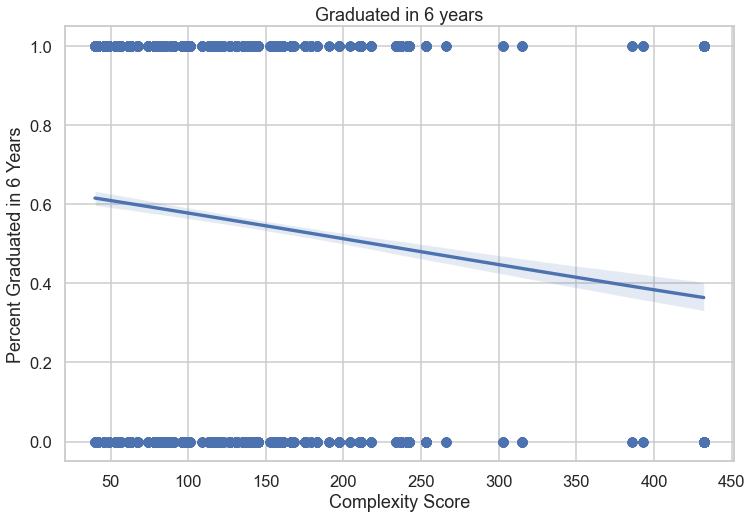

In [44]:
plt = sns.regplot(x="CURRICULAR_COMPLEXITY", y="GRADUATED_IN_6Y", data=df, logistic=True)
plt.set_title('Graduated in 6 years')
plt.set_xlabel("Complexity Score")
plt.set_ylabel("Percent Graduated in 6 Years")

Text(0, 0.5, 'Percent Graduated in 4 Years')

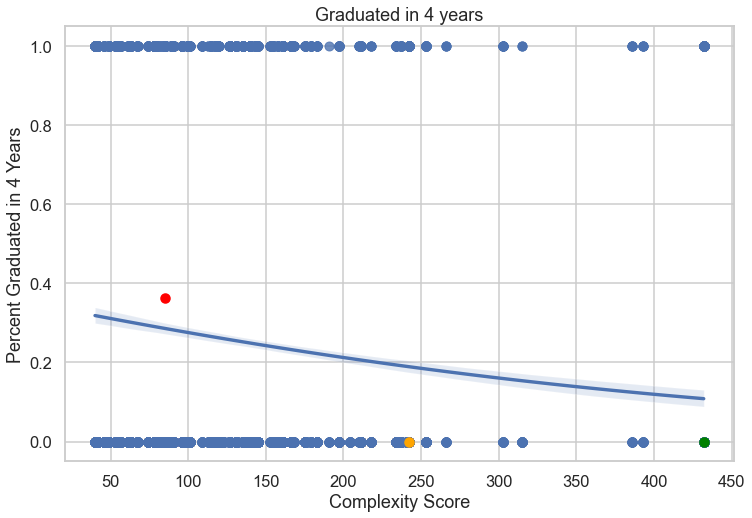

In [45]:
plt = sns.regplot(x="CURRICULAR_COMPLEXITY", y="GRADUATED_IN_4Y", data=df, logistic=True)
plt.scatter(85,.3630966,c="red") # Psychology
plt.scatter(432,0,c="green") # Mechanical Engineering: Aerospace Emphasis
plt.scatter(242,0,c="orange") # Biology: Human Biology Emphasis
plt.set_title('Graduated in 4 years')
plt.set_xlabel("Complexity Score")
plt.set_ylabel("Percent Graduated in 4 Years")

Text(0, 0.5, 'Percent Graduated in 5 Years')

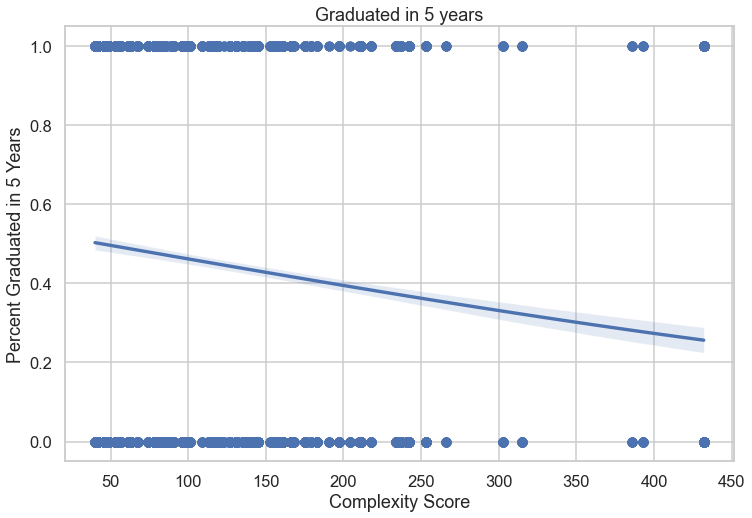

In [46]:
plt = sns.regplot(x="CURRICULAR_COMPLEXITY", y="GRADUATED_IN_5Y", data=df, logistic=True)
plt.set_title('Graduated in 5 years')
plt.set_xlabel("Complexity Score")
plt.set_ylabel("Percent Graduated in 5 Years")

Text(0, 0.5, 'Percent Graduated in 4 Years')

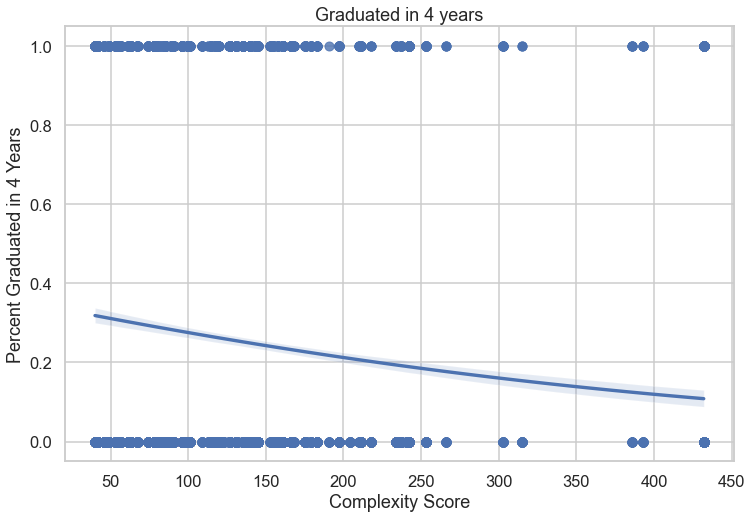

In [47]:
plt = sns.regplot(x="CURRICULAR_COMPLEXITY", y="GRADUATED_IN_4Y", data=df, logistic=True)
plt.set_title('Graduated in 4 years')
plt.set_xlabel("Complexity Score")
plt.set_ylabel("Percent Graduated in 4 Years")

In [135]:
import statsmodels.api as sm

Xtrain = df['CURRICULAR_COMPLEXITY']
ytrain = df['GRADUATED_IN_4Y']

log_reg = sm.Logit(ytrain, Xtrain).fit()

print("\nGraduated in 4 Years\n")
print(log_reg.summary())

print("P-Value: ", log_reg.pvalues)
print("Odds Ratio: ", np.exp(log_reg.params))
print("Confidence Interval: ", np.exp(log_reg.conf_int()))

Optimization terminated successfully.
         Current function value: 0.558603
         Iterations 5

Graduated in 4 Years

                           Logit Regression Results                           
Dep. Variable:        GRADUATED_IN_4Y   No. Observations:                 6293
Model:                          Logit   Df Residuals:                     6292
Method:                           MLE   Df Model:                            0
Date:                Sat, 06 Nov 2021   Pseudo R-squ.:               -0.001288
Time:                        13:48:58   Log-Likelihood:                -3515.3
converged:                       True   LL-Null:                       -3510.8
Covariance Type:            nonrobust   LLR p-value:                       nan
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
CURRICULAR_COMPLEXITY    -0.0070      0.000    -34.501      0.0

In [132]:
Xtrain = df['CURRICULAR_COMPLEXITY']
ytrain = df['GRADUATED_IN_5Y']

log_reg = sm.Logit(ytrain, Xtrain).fit()
print("\nGraduated in 5 Years\n")
print(log_reg.summary())

print("P-Value: ", log_reg.pvalues)
print("Odds Ratio: ", np.exp(log_reg.params))
print("Confidence Interval: ", np.exp(log_reg.conf_int()))

Optimization terminated successfully.
         Current function value: 0.692105
         Iterations 3

Graduated in 5 Years

                           Logit Regression Results                           
Dep. Variable:        GRADUATED_IN_5Y   No. Observations:                 5239
Model:                          Logit   Df Residuals:                     5238
Method:                           MLE   Df Model:                            0
Date:                Sat, 06 Nov 2021   Pseudo R-squ.:                0.001502
Time:                        13:47:31   Log-Likelihood:                -3625.9
converged:                       True   LL-Null:                       -3631.4
Covariance Type:            nonrobust   LLR p-value:                       nan
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
CURRICULAR_COMPLEXITY    -0.0005      0.000     -3.299      0.0

In [52]:
Xtrain = df['CURRICULAR_COMPLEXITY']
ytrain = df['GRADUATED_IN_6Y']

log_reg = sm.Logit(ytrain, Xtrain).fit()
print("\nGraduated in 6 Years\n")
print(log_reg.summary())

print("P-Value: ", log_reg.pvalues)
print("Odds Ratio: ", np.exp(log_reg.params))
print("Confidence Interval: ", np.exp(log_reg.conf_int()))
log_reg.get_margeff(at='overall', method='dydx').summary()

Optimization terminated successfully.
         Current function value: 0.693141
         Iterations 2

Graduated in 6 Years

                           Logit Regression Results                           
Dep. Variable:        GRADUATED_IN_6Y   No. Observations:                 6293
Model:                          Logit   Df Residuals:                     6292
Method:                           MLE   Df Model:                            0
Date:                Sat, 06 Nov 2021   Pseudo R-squ.:               -0.005437
Time:                        12:59:19   Log-Likelihood:                -4361.9
converged:                       True   LL-Null:                       -4338.3
Covariance Type:            nonrobust   LLR p-value:                       nan
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
CURRICULAR_COMPLEXITY  3.938e-05      0.000      0.285      0.7

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:        GRADUATED_IN_6Y
Method:                          dydx
At:                           overall
=========================================================================================
                           dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
CURRICULAR_COMPLEXITY  9.845e-06   3.45e-05      0.285      0.776   -5.78e-05    7.75e-05
=========================================================================================
"""

In [16]:
df = pd.DataFrame(pd.read_excel("./Fall 2012-15 Cohort Students with Grad Info for Curricular Complexity Analysis 27-AUG-21.xlsx", header=0))
df = df[df['OLD_CURRICULAR_COMPLEXITY'].notna()]
# df.drop('PR', axis=1, inplace=True)
df

,UNIQUE_ID,ISWHITE,FIRST_GEN_STUDENT,NUMBER_OF_COHORTS_STUDENT_IS_IN_BETWEEN_FALL2012_FALL2015,COHORT_TERM,COHORT_YEAR,COHORT_CODE,CHRT_TERM_PRI_PROGRAM,CHRT_TERM_PRI_PRGM_DESC,CHRT_TERM_PRI_MAJOR,...,GRADUATED_IN_6Y,UG_USU_GPA_LAST_ATTEND_OR_GRAD_TERM,CURRENT_UG_USU_GPA,EVER_GRADUATED_WITH_BACH,NUMBER_BACH_DEGREES_AWARDED,BACH_GRAD_TERM (when the student didn't graduate with primary program),BACH_PROGRAM (when the student didn't graduate with primary program),BACH_MAJOR (when the student didn't graduate with primary program),CURRICULAR_COMPLEXITY,OLD_CURRICULAR_COMPLEXITY
0,430706564270706527,1.0,1,1,201240,2012,1240FDF4,MISY_BS,Management Info Systems BS,MISY,...,1,3.68,3.68,Y,1.0,NaN,NaN,NaN,161.0,120.0
3,280005371300005330,0.0,0,1,201240,2012,1240FDF4,MEEN_PPRU,Mechanical Engineering PPRU,MEEN,...,1,3.58,3.59,Y,1.0,NaN,NaN,NaN,432.0,352.0
5,358504519288504528,1.0,0,1,201240,2012,1240FDF4,UNDE_PPRU,Undeclared PPRU,UNDE,...,1,3.31,3.31,Y,1.0,NaN,NaN,NaN,NaN,82.0
6,426731947296731929,1.0,0,1,201240,2012,1240FDF4,HEPR_COHE_BS,Health Ed Comm Health Emph BS,HEPR,...,1,3.49,3.49,Y,1.0,NaN,NaN,NaN,78.0,52.0
7,571961311291961329,1.0,0,1,201240,2012,1240FDF4,CDDE_BS,Comm Disorders & Deaf Ed BS,CDDE,...,1,3.80,3.80,Y,1.0,NaN,NaN,NaN,54.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13150,853696570203696520,1.0,0,1,201540,2015,1540PXF4,PSYC_PPRU,Psychology PPRU,PSYC,...,0,2.83,2.83,N,NaN,NaN,NaN,NaN,61.0,52.0
13161,9334561279334527,1.0,1,1,201540,2015,1540PXF4,ADVS_BVET_BS,ADVS Bioveterinary Sci Emph BS,ADVS,...,0,1.44,1.44,N,NaN,NaN,NaN,NaN,166.0,160.0
13173,331949303341949334,1.0,1,1,201540,2015,1540PXF4,UBUS_PPRU,Pre-Business,UBUS,...,0,3.66,3.66,N,NaN,NaN,NaN,NaN,96.0,75.0
13177,511449832291449829,1.0,1,1,201540,2015,1540PXF4,HMSC_PPTH_BS,HMSC:Pre-Phys Ther Emph BS,HMSC,...,0,1.50,1.50,N,NaN,NaN,NaN,NaN,NaN,110.0


Text(0, 0.5, 'Percent Graduated in 4 Years')

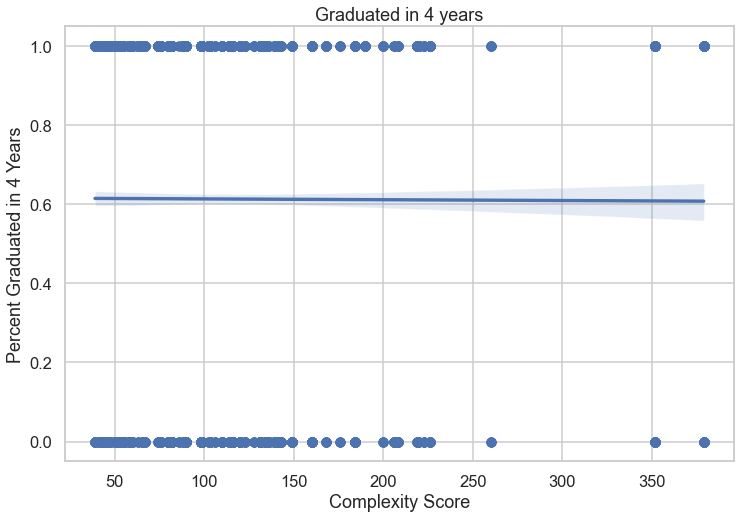

In [17]:
plt = sns.regplot(x="OLD_CURRICULAR_COMPLEXITY", y="GRADUATED_IN_6Y", data=df, logistic=True)
plt.set_title('Graduated in 4 years')
plt.set_xlabel("Complexity Score")
plt.set_ylabel("Percent Graduated in 4 Years")

In [21]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = df[ df['YEARS_TO_GRADUATION'].notnull() ]

X = df[['CURRICULAR_COMPLEXITY']]
Y = np.ravel(df['YEARS_TO_GRADUATION'].astype(float))

reg = LinearRegression()
reg.fit(X, Y)

LinearRegression()

In [22]:
reg.score(X, Y)

0.016442312492358835

In [23]:
x = X.head()
reg.predict(x)

array([4.89541527, 5.29981183, 4.77155949, 4.73574577, 4.89541527])

In [24]:
print(reg.intercept_)
print(reg.coef_)

4.655164907324535
[0.00149224]


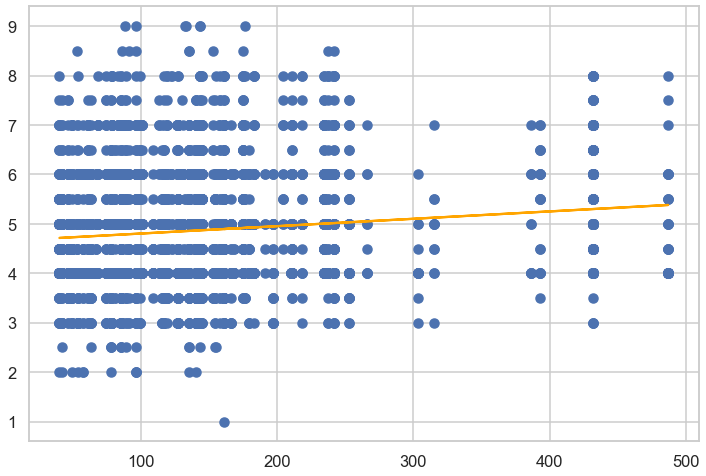

In [25]:
x = df['CURRICULAR_COMPLEXITY']
y = df['YEARS_TO_GRADUATION']

plt.scatter(x, y)
f = lambda x: reg.coef_*x + reg.intercept_
plt.plot(x, f(x), c="orange")

Text(0, 0.5, 'Percent Graduated in 4 Years')

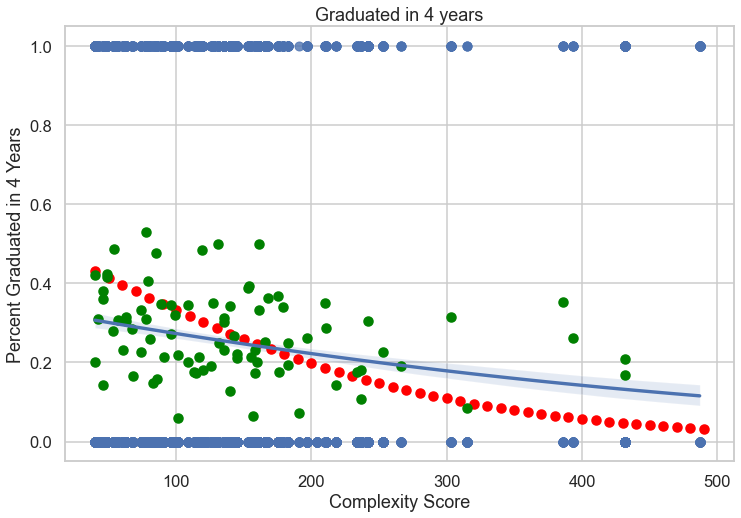

In [138]:
results = log_reg.predict(complexities_df['complexities'])
plt = sns.regplot(x="CURRICULAR_COMPLEXITY", y="GRADUATED_IN_4Y", data=df, logistic=True)
plt.scatter(complexities_df['complexities'],results,c="red") # Psychology
plt.scatter(newdf['CURRICULAR_COMPLEXITY'], newdf['GRADUATED_IN_4YEARS'], c="green")
plt.set_title('Graduated in 4 years')
plt.set_xlabel("Complexity Score")
plt.set_ylabel("Percent Graduated in 4 Years")

In [139]:
newdf = df.groupby(["PRIMARY_PROGRAM_LAST_ATTEND_TERM", "CURRICULAR_COMPLEXITY"], as_index=False).agg({"GRADUATED_IN_4Y": ['mean']})
newdf['GRADUATED_IN_4YEARS'] = newdf['GRADUATED_IN_4Y']['mean']
newdf = newdf[['PRIMARY_PROGRAM_LAST_ATTEND_TERM', 'CURRICULAR_COMPLEXITY', 'GRADUATED_IN_4YEARS']]
newdf = newdf[ (newdf['GRADUATED_IN_4YEARS'] < 1) & (newdf['GRADUATED_IN_4YEARS'] > 0) ]
newdf.head()

,PRIMARY_PROGRAM_LAST_ATTEND_TERM,CURRICULAR_COMPLEXITY,GRADUATED_IN_4YEARS
,,,
0,ACAJ_BS,109.0,0.200000
2,ACCT_BS,135.0,0.311594
5,ACCT_MACC,135.0,0.303030
6,ADVS_ANDS_BS,115.0,0.173611
7,ADVS_BVET_BS,166.0,0.251701


In [140]:
df = pd.DataFrame(pd.read_excel("./Fall 2012-15 Cohort Students with Grad Info for Curricular Complexity Analysis 27-AUG-21.xlsx", header=0))
df = df[df['CURRICULAR_COMPLEXITY'].notna()]
df = df[ df['PRIMARY_PROGRAM_LAST_ATTEND_TERM'].isin(newdf['PRIMARY_PROGRAM_LAST_ATTEND_TERM'])]
df.head()

,UNIQUE_ID,ISWHITE,FIRST_GEN_STUDENT,NUMBER_OF_COHORTS_STUDENT_IS_IN_BETWEEN_FALL2012_FALL2015,COHORT_TERM,COHORT_YEAR,COHORT_CODE,CHRT_TERM_PRI_PROGRAM,CHRT_TERM_PRI_PRGM_DESC,CHRT_TERM_PRI_MAJOR,...,GRADUATED_IN_6Y,UG_USU_GPA_LAST_ATTEND_OR_GRAD_TERM,CURRENT_UG_USU_GPA,EVER_GRADUATED_WITH_BACH,NUMBER_BACH_DEGREES_AWARDED,BACH_GRAD_TERM (when the student didn't graduate with primary program),BACH_PROGRAM (when the student didn't graduate with primary program),BACH_MAJOR (when the student didn't graduate with primary program),CURRICULAR_COMPLEXITY,OLD_CURRICULAR_COMPLEXITY
0,430706564270706527,1.0,1,1,201240,2012,1240FDF4,MISY_BS,Management Info Systems BS,MISY,...,1,3.68,3.68,Y,1.0,NaN,NaN,NaN,161.0,120.0
3,280005371300005330,0.0,0,1,201240,2012,1240FDF4,MEEN_PPRU,Mechanical Engineering PPRU,MEEN,...,1,3.58,3.59,Y,1.0,NaN,NaN,NaN,432.0,352.0
6,426731947296731929,1.0,0,1,201240,2012,1240FDF4,HEPR_COHE_BS,Health Ed Comm Health Emph BS,HEPR,...,1,3.49,3.49,Y,1.0,NaN,NaN,NaN,78.0,52.0
7,571961311291961329,1.0,0,1,201240,2012,1240FDF4,CDDE_BS,Comm Disorders & Deaf Ed BS,CDDE,...,1,3.80,3.80,Y,1.0,NaN,NaN,NaN,54.0,98.0
8,711220482301220430,1.0,0,1,201240,2012,1240FDF4,UBUS_PPRU,Pre-Business,UBUS,...,1,3.25,3.25,Y,1.0,NaN,NaN,NaN,161.0,120.0


Optimization terminated successfully.
         Current function value: 0.612104
         Iterations 5


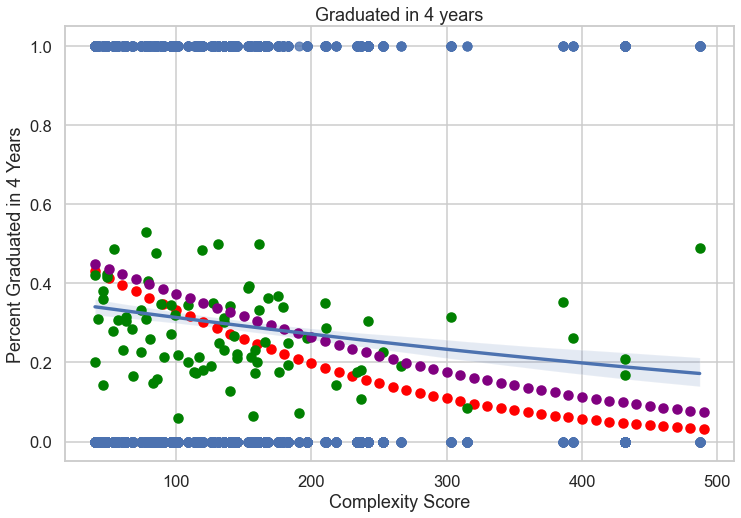

In [141]:
results = log_reg.predict(complexities_df['complexities'])
plt = sns.regplot(x="CURRICULAR_COMPLEXITY", y="GRADUATED_IN_4Y", data=df, logistic=True)
plt.scatter(complexities_df['complexities'],results,c="red")
plt.scatter(newdf['CURRICULAR_COMPLEXITY'], newdf['GRADUATED_IN_4YEARS'], c="green")
plt.set_title('Graduated in 4 years')
plt.set_xlabel("Complexity Score")
plt.set_ylabel("Percent Graduated in 4 Years")

Xtrain = df['CURRICULAR_COMPLEXITY']
ytrain = df['GRADUATED_IN_4Y']

log_reg2 = sm.Logit(ytrain, Xtrain).fit()
results2 = log_reg2.predict(complexities_df['complexities'])
plt.scatter(complexities_df['complexities'],results2,c="purple")


In [17]:
# Mean complexity for graduates
a = int(df[ df['GRADUATED_IN_4Y'] == 1]['CURRICULAR_COMPLEXITY'].mean())
print(f"The average complexity for graduates is {a}")

The average complexity for graduates is 136


In [18]:
# Mean complexity for non-graduates
a = int(df[ df['GRADUATED_IN_4Y'] == 0]['CURRICULAR_COMPLEXITY'].mean())
print(f"The average complexity for non-graduates is {a}")

The average complexity for non-graduates is 161


In [19]:
# Average complexity overall
print(f"The average complexity for non-graduates is {int(df['CURRICULAR_COMPLEXITY'].mean())}")

The average complexity for non-graduates is 155
